In [29]:
from torchvision import models, transforms
from PIL import Image
import torch
import sys, os
project_root = os.path.abspath(os.path.join(".."))  # Goes up from current dir
sys.path.append(project_root)
from source.saliency import DinoSaliency
import torch
from CLIP_.clip import clip
from PIL import Image

%load_ext autoreload
%autoreload 2
num = 10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
# Load & preprocess your image:
img_rgb = Image.open("../data/duck/rgb/train/r_{}.png".format(num)).convert("RGB")
#test = dino_saliency_map(img_pil)
device = "cuda" if torch.cuda.is_available() else "cpu"
test = 0
shape = (224, 224)
image_test = transforms.Compose([
    transforms.Resize(shape),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                         std=[0.26862954, 0.26130258, 0.27577711]),
])(img_rgb).unsqueeze(0).to(device)

In [31]:
saliency_dino = DinoSaliency(
    device=device,
    preprocess_shape=(shape)
)

Using cache found in /home/efe/.cache/torch/hub/facebookresearch_dino_main


In [32]:
dino_saliency = saliency_dino.compute(image_test)

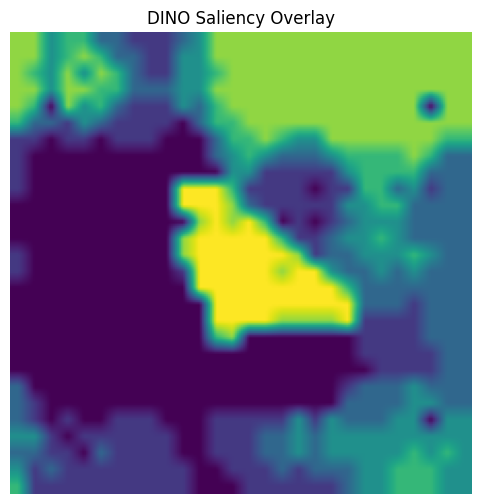

In [33]:
import matplotlib.pyplot as plt
# Average across heads → single H×W map
avg_saliency = dino_saliency.mean(dim=0)  # shape (H, W)

# Convert to NumPy
sal = avg_saliency.cpu().numpy()

plt.figure(figsize=(6,6))
#plt.imshow(saliency.preprocess_image(img_pil).cpu())                     # show original
plt.imshow(sal, alpha=1)    # overlay saliency heatmap
plt.axis('off')
plt.title("DINO Saliency Overlay")
plt.show()